### 사용자 함수
- 프로그래밍에서 반복적으로 사용하는 코드를 함수로 정의
- 파이썬 함수 구조
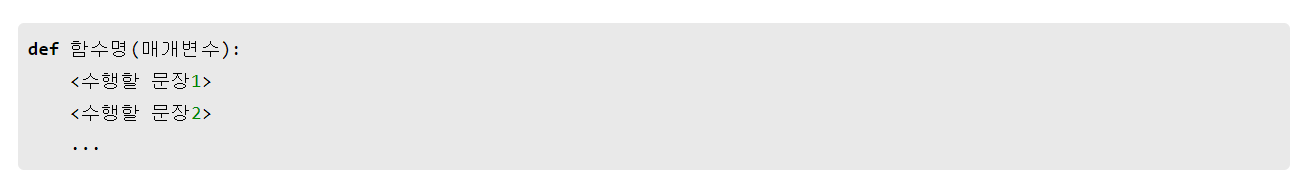
- 참조: https://wikidocs.net/24

In [1]:
## 실행문만 있는 함수

## 함수 생성
def prn_hello(name, age):
    print(f'{name}님의 나이는 {age}입니다.')

## 함수 호출
prn_hello("원동찬", 28)

원동찬님의 나이는 28입니다.


In [2]:
## 두 수를 입력받아 더하기를 실행하고 결과를 돌려주는

def add(a,b):
    tot = a + b
    return tot

## 함수 호출
ptot=add(10,20)
print(f'함수호출결과: {ptot}')

### 함수에서 여러개의 결과값 전달

def add1(a,b):
    tot = a + b
    return a, b, tot

pa,pb,ptot = add1(10,20)
print(f"함수호출결과: {ptot}")
print(f"함수a: {pa}, 함수b:{pb}")

함수호출결과: 30
함수호출결과: 30
함수a: 10, 함수b:20


### folium 모듈을 이용한 지도 그리기
- folium 모듈 설치/연결

In [3]:
import folium

map = folium.Map(location=[36.48026343330978, 127.28923349814958], zoom_start = 16)
map.save('map_1.html')
#map

In [4]:
# map에 위치 표시하기
folium.Marker([36.48026343330978, 127.28923349814958],          # 표식이 출력될 위치
              popup="세종시청",                                   # 마우스를 클릭하면 출력할 내용
              icon=folium.Icon(color="blue")).add_to(map)
map.save('map_1.html')

In [5]:
# map에 위치 표시하기
folium.Marker([37.503, 127.049],          # 표식이 출력될 위치
              popup="멀티캠퍼스 선릉",                                   # 마우스를 클릭하면 출력할 내용
              icon=folium.Icon(color="blue")).add_to(map)
map.save('map_1.html')

#### 관광정보 csv 파일로 맵 그리기

1. 관광정보.csv 파일 읽어오기

In [7]:
f = open("./관광정보.csv","r")
data = f.readlines()    # 전체를 리스트 형식으로 읽어오기(행단위)
f.close()   # 관광정보.csv 파일 닫기
data_lst = []
# print(data[1])  # 관광정보.csv 데이터 위쪽 10개만 출력 
for i in range(1,11):
    data_lst.append(data[i].replace("\n","").split(",")) # i번째 데이터에서 "\n" 제거 후 ","로 나누기
print(data_lst)

[['0', '가락몰 페스티벌 2019', '서울특별시 송파구 양재대로 932', '02-3435-1000', '2019-10-11', '2019-10-12', '37.4960925880', '127.1109831778'], ['1', '가리왕산 MUSIC FESTIVAL 2020', '강원도 정선군 북평면 중봉길 41-35', '033-560-3016', '2020-08-21', '2020-08-22', '37.4742535268', '128.6097538017'], ['2', '가야문화축제 2020', '경상남도 김해시 가야의길 126', '055-330-3958', '2020-10-29', '2020-11-01', '35.2360687598', '128.8731002475'], ['3', '"가을 밀양강 오딧세이 ""아리랑 환타지! 밀양!"" 2019"', '경상남도 밀양시 중앙로 324 영남루 및 밀양강 야외 공연장 일대', '055-359-4527', '2019-10-18', '2019-10-19', '35.4921350361', '128.7552590901'], ['4', '가을 화담숲 단풍 축제 2019', '경기도 광주시 도척면 도척윗로 278', '031-8026-6666', '2019-10-12', '2019-11-10', '37.3374836915', '127.2922239974'], ['5', '가을맥주페스타 2019', '"부산광역시 부산진구 서면문화로 32 3', '4층"', '070-4880-2678', '2019-09-26', '2019-09-29', '35.1599862176', '129.0563669161'], ['6', '가족사랑 걷기대회 2019', '부산광역시 사하구 낙동남로1233번길 1', '"낙동강문화관 (연락처) 051-292-1042', ' 사하구건강가정지원센터 (연락처) 051-203-4588"', '2019-09-28', '2019-09-28', '35.1083149990', '128.9474472484'], 

In [8]:
import folium

map = folium.Map(location=[36.4804704, 127.289222], zoom_start=10)

In [9]:
def map_prn(lat, lng, pop):
    folium.Marker([lat, lng], popup="pop", icon=folium.Icon(color="red")).add_to(map)


In [11]:
for i in range(0,10):
    map_prn(float(data_lst[i][-2]), float(data_lst[i][-1]), data_lst[i][1])
map.save("./관광맵.html")

#### [미션] 관광정보에서 상위 열개의 정보 지도에 표시
- 제목 또는 주소에 쉼표(",")가 포함되면 출력하지 않음

In [13]:
f = open("./관광정보.csv","r")
data = f.readlines()
f.close()

data_lst = [data[i].replace("\n","").split(",") for i in range(1,11)]


map = folium.Map(location=[36.4804704, 127.289222], zoom_start = 10)
#### 데이터 갯수가 8개이면 출력
for t in data_lst:
    try:
        if len(t) == 8:
            map_prn(float(t[-2]), float(t[-1],t[1]))
    except:
        pass
map.save("./관광맵.html")